# Agglomerative Clustering

This notebook will show how we can segment an image with scikit-learn, we will be working with coin image data, we will go over how to modify and clean an image so it can be fed into a clustering algorithm

####  The segmentation of a 2D image with Ward agglomerative clustering

In [1]:
!pip install scikit-image

/bin/sh: pip: command not found


In [2]:
import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
import numpy as np

coins = coins()

In [3]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [4]:
coins.shape

(303, 384)

### Actual gray image of coins

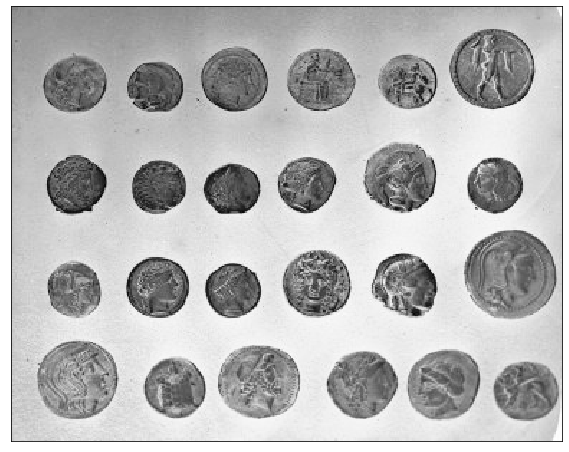

In [5]:
plt.figure(figsize=(10, 8))
plt.imshow(coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

### Guassian filter used to blur the image

In [6]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [7]:
smoothened_coins = gaussian_filter(coins, sigma=2)

### Smooth or blur Image

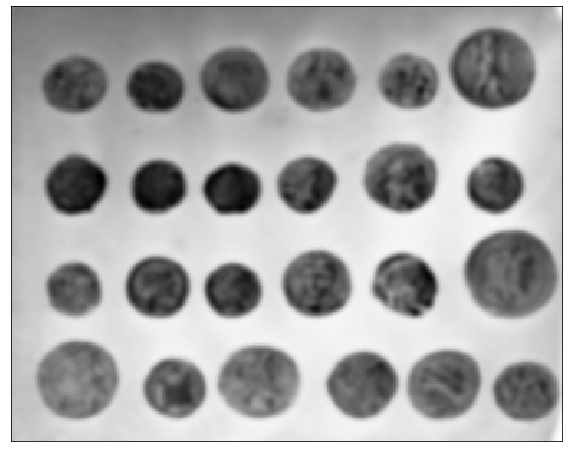

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(smoothened_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

### Rescaled coins
Rescale the coins and display the image

In [9]:
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect", 
                         anti_aliasing=True, multichannel=False)

In [10]:
rescaled_coins

array([[0.5057926 , 0.51372674, 0.50980392, ..., 0.37248598, 0.32509487,
        0.15272368],
       [0.50588235, 0.50215365, 0.50215365, ..., 0.35692202, 0.32526101,
        0.23814825],
       [0.49443909, 0.49051752, 0.48659595, ..., 0.34529216, 0.33325694,
        0.30913349],
       ...,
       [0.28627451, 0.28980451, 0.28627451, ..., 0.2817205 , 0.27035279,
        0.14040627],
       [0.28649284, 0.27824227, 0.27823851, ..., 0.2785587 , 0.25398147,
        0.0936046 ],
       [0.29015767, 0.26660363, 0.27058824, ..., 0.28627451, 0.21093648,
        0.05083971]])

In [11]:
rescaled_coins.shape

(61, 77)

### Rescaled coins image

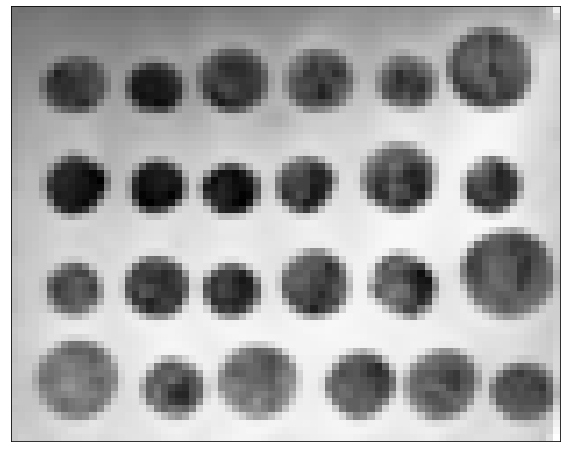

In [12]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
n_clusters = 10

### Agglomerative clustering 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [14]:
X = np.reshape(rescaled_coins, (-1, 1))

X.shape

(4697, 1)

In [15]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10)

In [16]:
ac.labels_

array([2, 2, 2, ..., 1, 0, 9])

In [17]:
labels = np.reshape(ac.labels_, rescaled_coins.shape)

labels.shape

(61, 77)

In [18]:
unique_labels =  np.unique(labels)

unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Display image after clustering

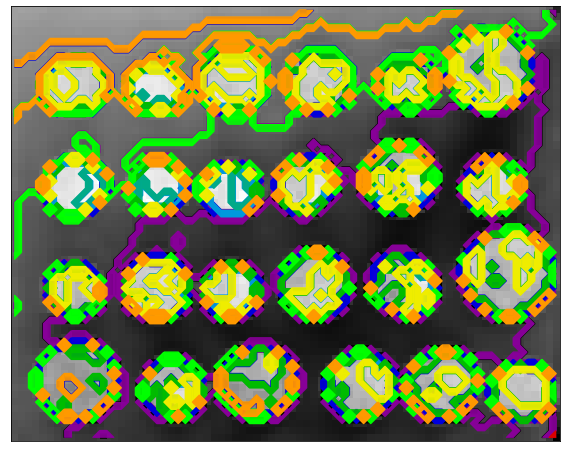

In [19]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])
    
plt.xticks(())
plt.yticks(())

plt.show()

In [20]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

connectivity.shape

(4697, 4697)

In [21]:
n_clusters = 27

In [22]:
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)

ward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=27)

In [23]:
labels = np.reshape(ward.labels_, rescaled_coins.shape)

In [24]:
unique_labels =  np.unique(labels)

print("Number of clusters: ", unique_labels)

Number of clusters:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


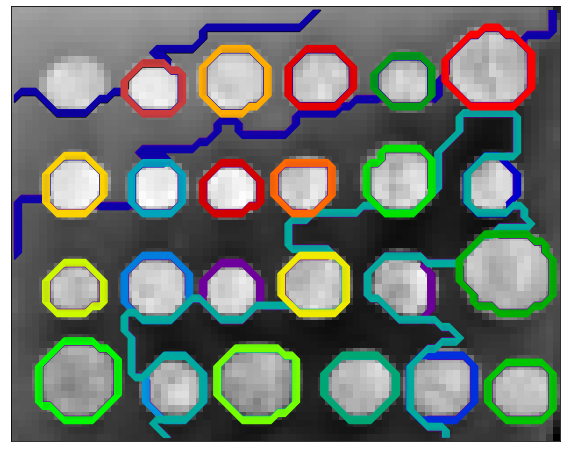

In [25]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()